In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [143]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/DRREDDY.csv")

In [144]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


In [145]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [146]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1827.672814,1830.099821,1855.226715,1803.185488,1828.279693,1828.382689,1829.621266,4.409815e+05,1.045022e+14,37121.187296,2.174943e+05,0.523664
std,1092.984492,1095.534718,1106.531082,1082.903924,1093.978015,1093.927165,1094.668053,6.060398e+05,2.719076e+14,39213.885661,1.871552e+05,0.165854
min,374.000000,365.650000,384.950000,355.250000,375.150000,374.000000,372.550000,7.070000e+02,4.333085e+10,450.000000,7.070000e+02,0.036800
25%,906.175000,908.175000,923.175000,897.000000,906.125000,906.175000,907.810000,1.669668e+05,1.787360e+13,17731.000000,9.731900e+04,0.411500
50%,1538.825000,1539.500000,1565.375000,1511.125000,1539.000000,1539.400000,1540.465000,2.959825e+05,4.506694e+13,27115.000000,1.692400e+05,0.539100
75%,2609.337500,2612.000000,2641.500000,2582.900000,2609.812500,2609.625000,2608.522500,5.271700e+05,1.020985e+14,43138.750000,2.769510e+05,0.644200
max,5416.800000,5440.950000,5512.650000,5329.450000,5413.000000,5416.800000,5396.870000,2.198715e+07,1.157853e+16,929801.000000,2.065429e+06,1.000000


In [147]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [148]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [149]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [150]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [151]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [152]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [153]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.983003,-1.137561,5066.70,950577,NaN
5302,1.884951,-0.653177,5057.25,957835,NaN
5303,1.528827,-0.749624,5044.45,843953,NaN
5304,2.016937,0.632119,5102.30,1071931,NaN
5305,1.675073,0.449416,5163.10,1306950,NaN


In [154]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [155]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [156]:
#Define the prediction model
model = RandomForestRegressor()

In [157]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9650820010566917


In [159]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [160]:
predictions = model.predict(X_Check)

In [161]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

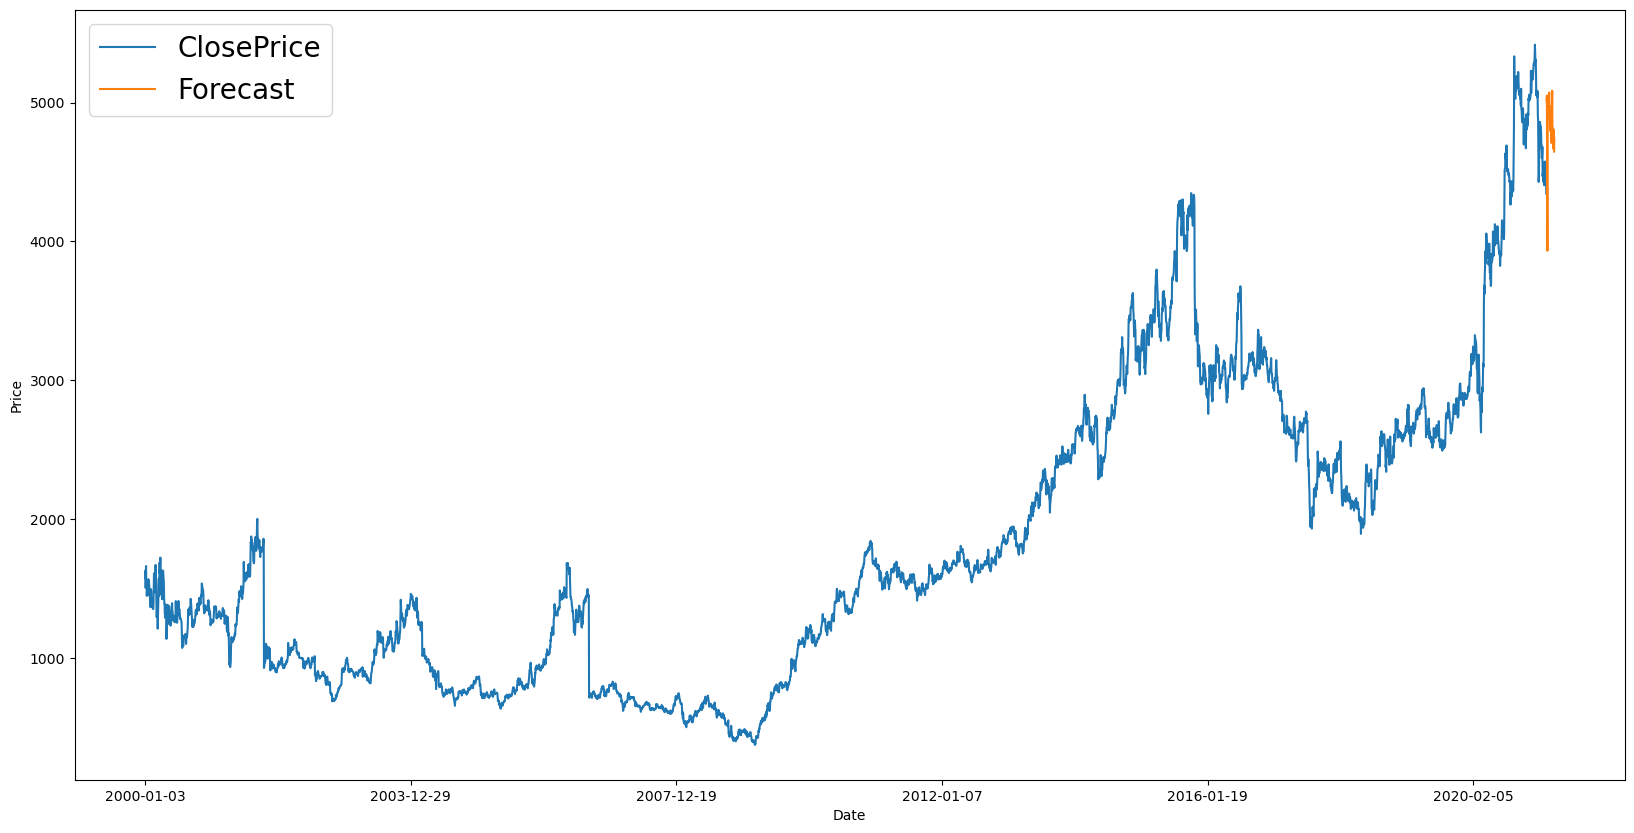

In [162]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')